In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import os
import os.path as osp
import cv2
from vehicle_reid.embedder import Embedder
from vehicle_reid.evaluate import Evaluator
from vehicle_reid import exp_config
from vehicle_reid.common import *
from sift_match.sift_match import *
from matplotlib import pyplot as plt
from classifier import classifier_common as clscom
import tensorflow as tf
import numpy as np
import h5py
from PIL import Image
GPU_ID = "0"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
QUE_EMB = "MGN-emb/query_emb.h5"
TES_EMB = "MGN-emb/test_emb.h5"
DIST = "MGN-emb/dist.h5"
test_full_ids, test_full_paths, test_full_track = read_csv_dataset(TESTFULL['csv_in'])
test_full_paths = np.array( [osp.join(TESTFULL['root'], x) for x in test_full_paths])
test_full_uni, tefuid = np.unique(test_full_track,  return_index=True)
query_emb = load_h5(QUE_EMB, "emb")
test_full_emb = load_h5(TES_EMB, "emb")
test_full_track_emb = np.array([np.average(test_full_emb[test_full_track == x], axis = 0) for x in test_full_uni])

In [6]:
evaluator = Evaluator("", GPU_ID)
queryquery = evaluator.calculate_distances(query_emb, query_emb)
querytestfull = evaluator.calculate_distances(query_emb, test_full_track_emb)
testfulltestfull = evaluator.calculate_distances(test_full_track_emb,test_full_track_emb)


(1052, 1052)

(1052, 798)

(798, 798)


In [27]:
dist = load_h5(DIST, "dist")

In [30]:
dist.shape

(1052, 18290)

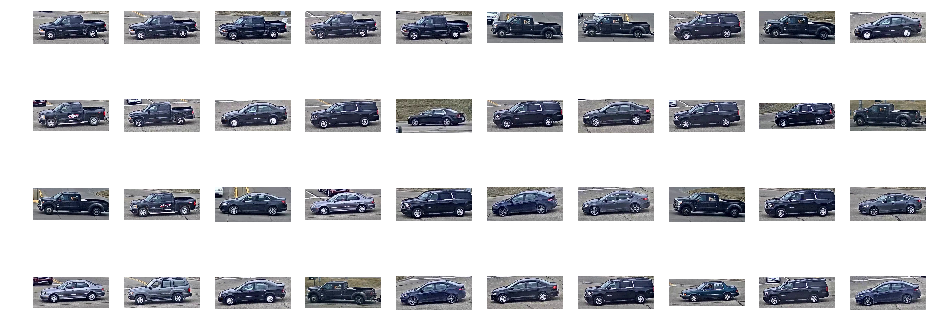

In [31]:
vis_img_group(test_full_paths[np.argsort(dist[141,:])[:40]])

In [7]:
save_dist(queryquery, "mgn_queque_1052x1052")
save_dist(querytestfull, "mgn_quetest_1052x798")
save_dist(testfulltestfull, "mgn_testtest_798x798")